In [13]:
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt
import rasterio.plot
import os
from datetime import datetime as dt

In [14]:
def get_date_from_filename(filename):
    datestring = filename[2:10]
    date = dt.strptime(datestring, '%Y%m%d')
    
    return date

In [15]:
# Load all the snowdepth rasters and stack them into an ndarray

# Specify the folder that has our ASO snow depth rasters
folder = r'C:/Users/steve/git/whw2019_snowmelt/data/aso_masked/2016/'

date = []
snowdepth = np.zeros((1684,1777))

# Loop through here and find each .tif, then apply the mask and write a new .tif file
for _,_,filenames in os.walk(folder):
    for file in filenames:
        fileExt=os.path.splitext(file)[-1]
        if fileExt == '.tif':
            with rio.open(folder+file,'r') as src:
                date.append(get_date_from_filename(file))
                snowdepth = np.dstack((snowdepth,src.read(1)))

# Remove the "np.zeros" array which is in the 0th position
snowdepth = snowdepth[:,:,1:]  

# Sort the data in chronological order
date_idx = date.argsort()
date = date[date_idx[::1]]
snowdepth = snowdepth[:,:,date_idx[::1]]

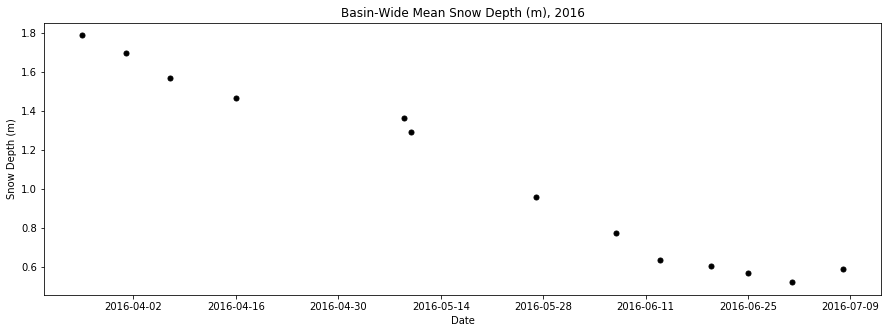

In [32]:
plt.figure(figsize=(15,5))
plt.plot(date,np.nanmean(snowdepth,axis=(0,1)),'.k',markersize=10)
plt.ylabel('Snow Depth (m)')
plt.xlabel('Date')
plt.title('Basin-Wide Mean Snow Depth (m), 2016');

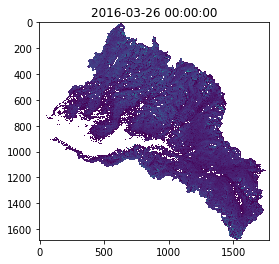

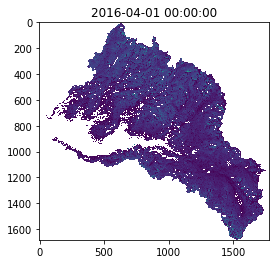

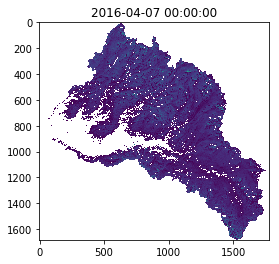

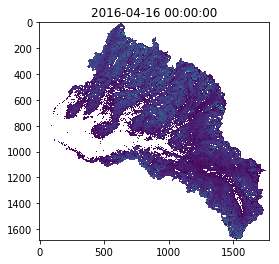

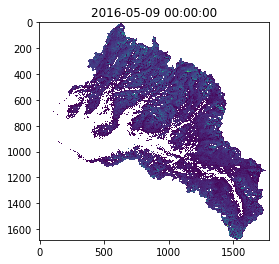

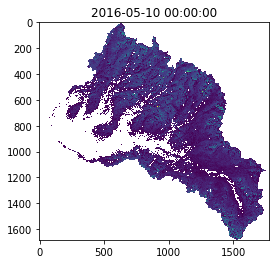

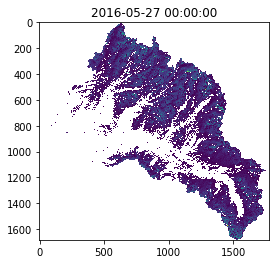

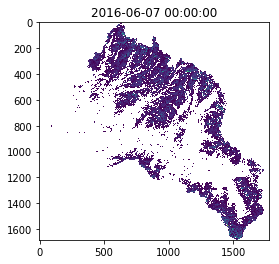

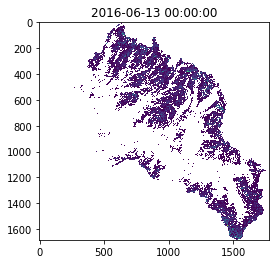

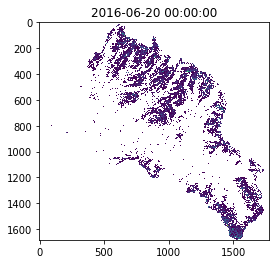

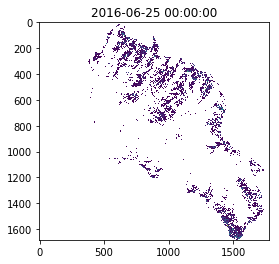

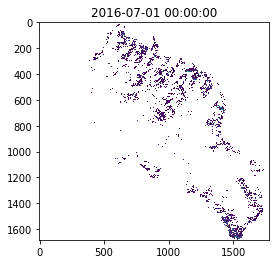

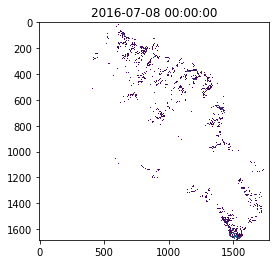

In [28]:
for i in range(0,snowdepth.shape[2]):
    plt.figure()
    plt.imshow(snowdepth[:,:,i])
    plt.title(str(date[i]))